<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WK9/blob/main/Titanic_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Survival Status of Titanic Passengers  
  
## Overview
**i. Understanding the context**  
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date.  Data on the people on board was collected and we would like to create a model that predicts whether or not a passenger survived based on the given data
  
**ii. Specifying the objectives**  
The specific objective of this project are:  
> To build a model that determines whether or not a passenger survived the accident.

**iii. Defining the metric for success**  
The project will be considered successful when the model has an accuracy score and recall score of 85% and above.   

**iv. Data relevance**  
The following are the variables contained in the retreived dataset and their description.  
* Survived - Survival status of the passengers 0 = No, 1 = Yes
* Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex - Gender of the passengers
* Age - Age of the passengers in years
* SibSp - Number of siblings and/or spouses on-board 
* ParCh - Number of parents and/or children on-board
* Ticket - Ticket number
* Fare - Amount paid to board the ship
* Cabin - Cabin number
* Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
The given data seems to be relevant for the project

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the dataset with appropriate data for our project  
b. Perform data cleaning by dropping irrelevant data, finding and dealing with duplicates, missing data, and anomalies   
c. Perform descriptive analysis to gain insights on the given data  
d. Build a KNN classification model   
e. Give conclusions and recommendations 

## Importing libraries

In [104]:
# Import relevant libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [105]:
# Disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [106]:
# Set all float results in a dataframe to have only two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Loading datasets

In [107]:
# Load the train and test files into a pandas dataframe
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

## Reading the datasets

In [108]:
# Preview the first five rows of the train set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [109]:
# Preview the first five rows of the test set
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [110]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (891, 12)
The shape of the test set is: (418, 11)


The test set is missing the 'Survived' column which will be predicted using the model that we are going to build

In [111]:
# Check the data types of the columns in each set
print(f'The data types of the columns in the train set are:\n{train.dtypes}\n\nThe data types of the columns in the test set are:\n{test.dtypes}')

The data types of the columns in the train set are:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The data types of the columns in the test set are:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Data cleaning

In [112]:
# Check for number of duplicates in each set
print(f'The number of duplicates in the train set are: {train.duplicated().sum()}\nThe number of duplicates in the test set are: {test.duplicated().sum()}')

The number of duplicates in the train set are: 0
The number of duplicates in the test set are: 0


In [113]:
# Check the number of missing values in each column in each set
print(f'The number of missing values in each column in the train set is:\n{train.isnull().sum()}\n\nThe number of missing values in each column in the test set is:\n{test.isnull().sum()}')

The number of missing values in each column in the train set is:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The number of missing values in each column in the test set is:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


'Cabin' column has too many missing values in each set therefore it will be dropped. 

In [114]:
# Dealing with missing values

#Drop 'Cabin' column in each set
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Train set
# Fill the missing values in 'Age' with the mean age per gender
train['Age'] = round(train['Age'].fillna(train.groupby('Sex')['Age'].transform('mean')))

# Fill the missing values in 'Embarked' with the mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Tests set
# Fill the missing values in 'Age' with mean age per gender
test['Age'] = round(test['Age'].fillna(test.groupby('Sex')['Age'].transform('mean')))

# Fill the missing values in 'Fare' with mean fare
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

# Check the number of missing values in each set after cleaning
print(f'The total number of missing values in the train set is: {train.isnull().sum().sum()}\nThe total number of missing values in the test set is: {test.isnull().sum().sum()}')

The total number of missing values in the train set is: 0
The total number of missing values in the test set is: 0


In [115]:
# Drop irrelevant columns
train.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

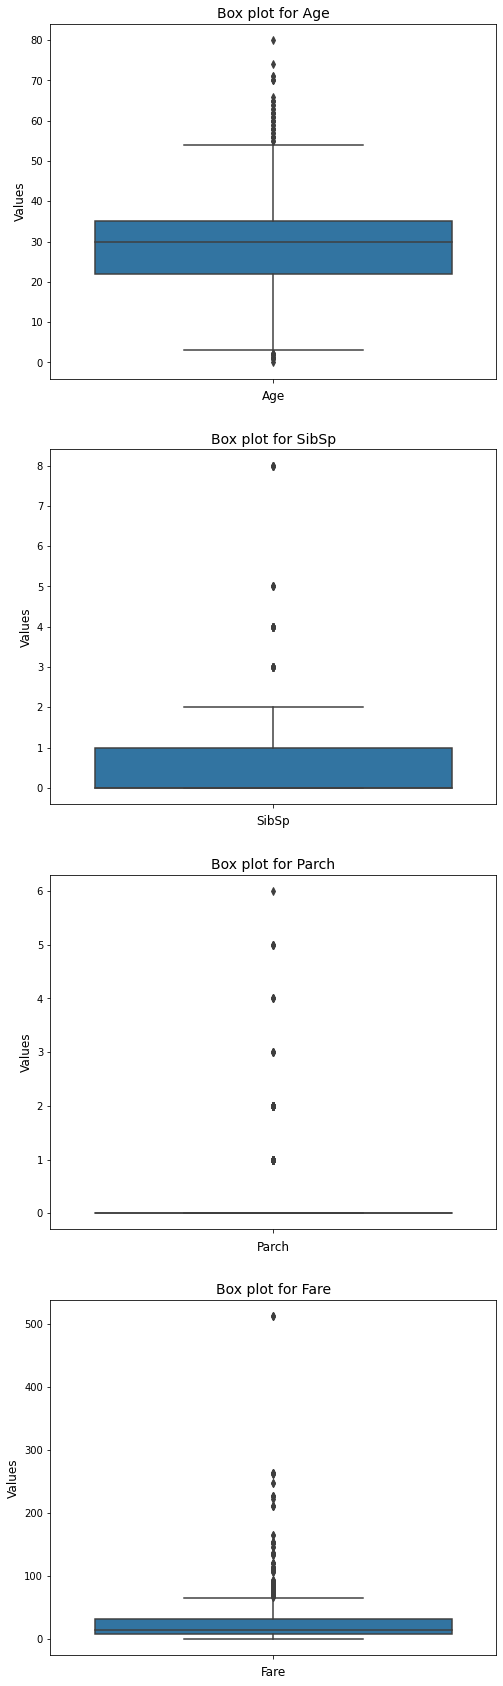

In [116]:
# Check for outliers in the numerical variables using box plots (train set)

# Create a list of the numerical variables
numerical = ['Age','SibSp', 'Parch', 'Fare']

# Specify the size of the figure
fig, ax = plt.subplots(len(numerical), figsize=(8,30))

# Plot boxplots for each variable
for i, col_val in enumerate(numerical):

    sns.boxplot(y=train[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Values', fontsize=12)

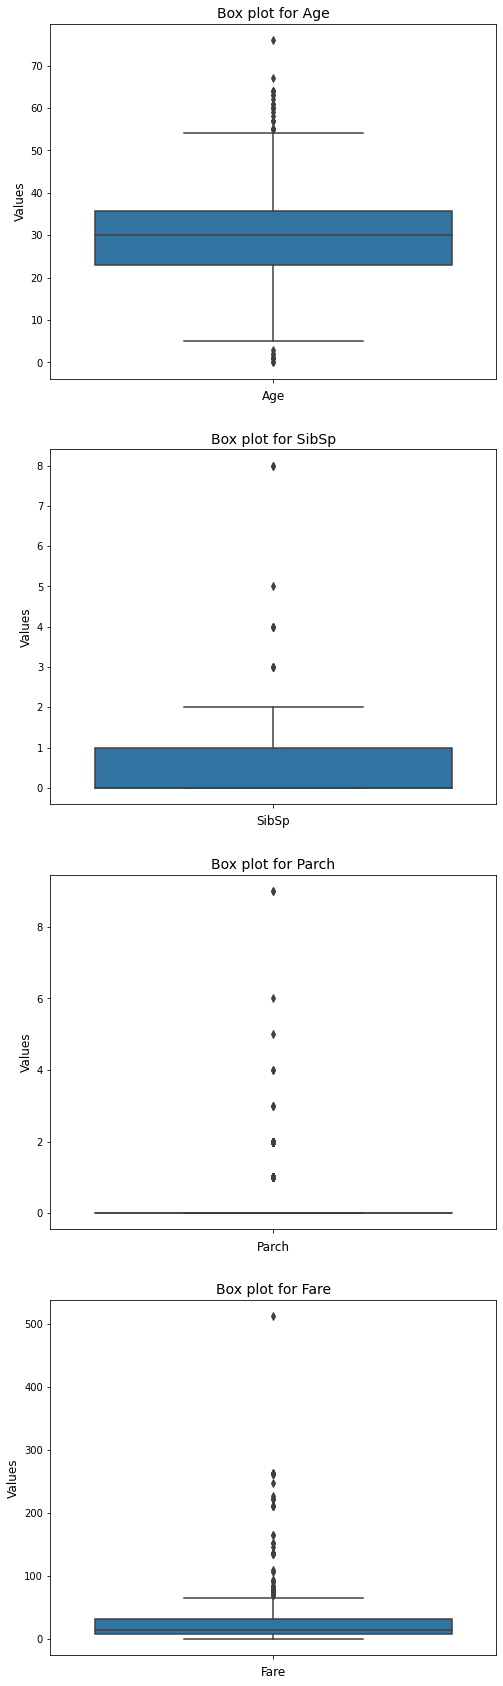

In [117]:
# Check for outliers in the numerical variables using box plots (test set)

# Specify the size of the figure
fig, ax = plt.subplots(len(numerical), figsize=(8,30))

# Plot boxplots for each variable
for i, col_val in enumerate(numerical):

    sns.boxplot(y=test[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Values', fontsize=12)

Since all the outliers represent accurate data, there are no justifiable reasons to drop them; for this reason, they will be retained

In [118]:
# Identify anomalies in the categorical variables by checking their unique values (train set)

# create a list of the categorical variables in the dataframe
categorical_train = ['Pclass', 'Sex', 'Embarked', 'Survived']

# print out the unique values in each variable
for i, col_val in enumerate(categorical_train):
  print('Unique values in {}'.format(col_val))
  print(train[col_val].unique())
  print()

Unique values in Pclass
[3 1 2]

Unique values in Sex
['male' 'female']

Unique values in Embarked
['S' 'C' 'Q']

Unique values in Survived
[0 1]



In [119]:
# Identify anomalies in the categorical variables by checking their unique values (test set)

# create a list of the categorical variables in the dataframe
categorical_test= ['Pclass', 'Sex', 'Embarked']

# print out the unique values in each variable
for i, col_val in enumerate(categorical_test):
  print('Unique values in {}'.format(col_val))
  print(test[col_val].unique())
  print()

Unique values in Pclass
[3 2 1]

Unique values in Sex
['male' 'female']

Unique values in Embarked
['Q' 'S' 'C']



There are no anomalies in any of the categorical variables in both sets

In [120]:
# Check the shape of the train and test sets after cleaning
print(f'The shape of the train set after cleaning is: {train.shape}\nThe shape of the test set after cleaning is: {test.shape}')

The shape of the train set after cleaning is: (891, 8)
The shape of the test set after cleaning is: (418, 7)


## Descriptive statistics

### Univariate analysis  
Univariate analysis will help us gain insights on the characteristics of each variable

3   0.55
1   0.24
2   0.21
Name: Pclass, dtype: float64
male     0.65
female   0.35
Name: Sex, dtype: float64
S   0.73
C   0.19
Q   0.09
Name: Embarked, dtype: float64
0   0.62
1   0.38
Name: Survived, dtype: float64
0   0.68
1   0.23
2   0.03
4   0.02
3   0.02
8   0.01
5   0.01
Name: SibSp, dtype: float64
0   0.76
1   0.13
2   0.09
5   0.01
3   0.01
4   0.00
6   0.00
Name: Parch, dtype: float64


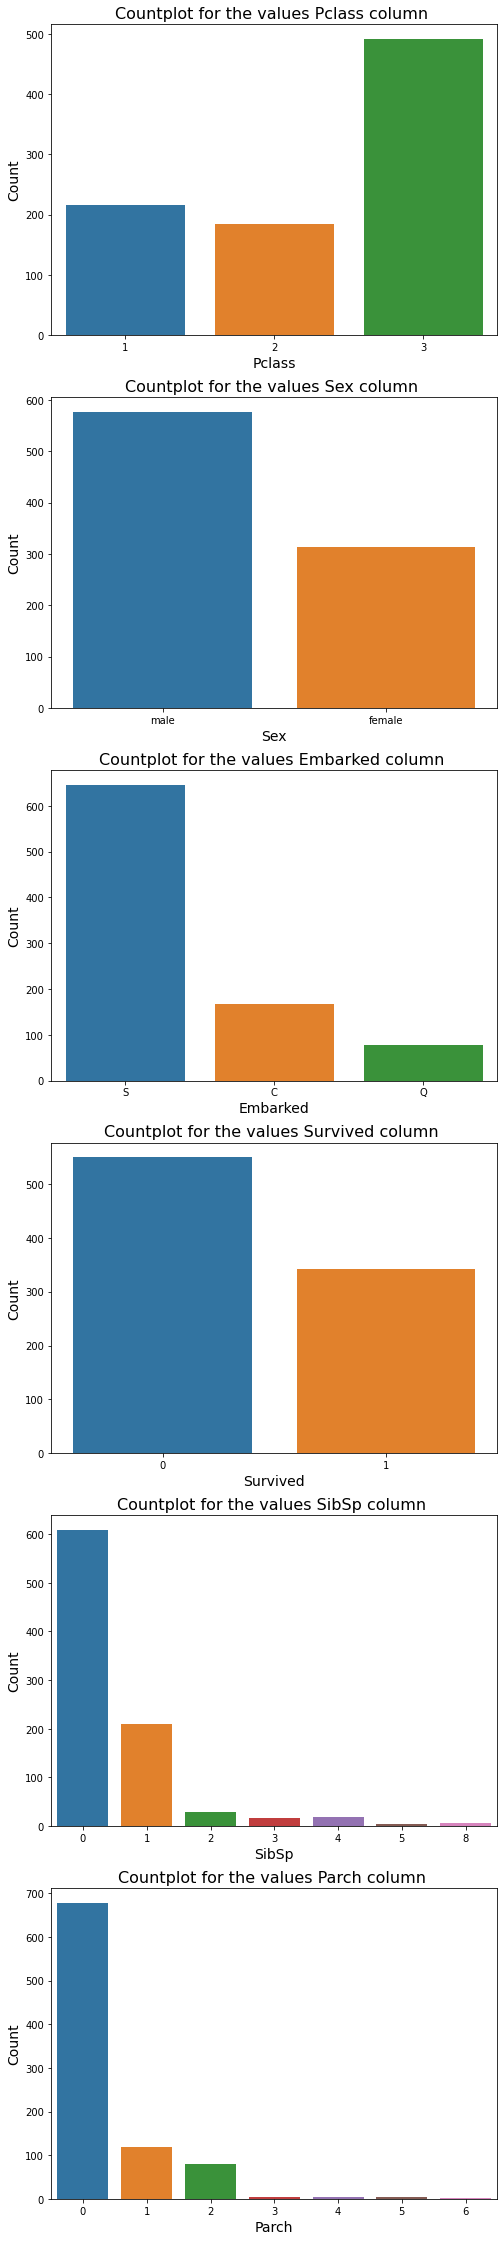

In [121]:
# Plot count plots to see the proportion of values  in each categorical variable and discrete numerical variable (train set)
col_names= ['Pclass', 'Sex', 'Embarked', 'Survived', 'SibSp', 'Parch']


# Set the size of the figure
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

# Plot the countplots
for i, col_val in enumerate(col_names):  
    sns.countplot(x=train[col_val], ax=ax[i])
    ax[i].set_title('Countplot for the values {} column '.format(col_val), fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)
    print(train[col_val].value_counts(normalize=True))

* Most of the passengers were in 3rd class followed by 1st class then 2nd class
* Most of the passengers were males
* The majority of the passengers embarked the titanic at Southampton port
* The number of passengers who died was higher than the number of survirors  
* Most of the passengers did not have a sibling or spouse on board
* The majority of the passengers did not have a parent or child on board



3   0.52
1   0.26
2   0.22
Name: Pclass, dtype: float64
male     0.64
female   0.36
Name: Sex, dtype: float64
S   0.65
C   0.24
Q   0.11
Name: Embarked, dtype: float64
0   0.68
1   0.26
2   0.03
4   0.01
3   0.01
8   0.00
5   0.00
Name: SibSp, dtype: float64
0   0.78
1   0.12
2   0.08
3   0.01
9   0.00
4   0.00
6   0.00
5   0.00
Name: Parch, dtype: float64


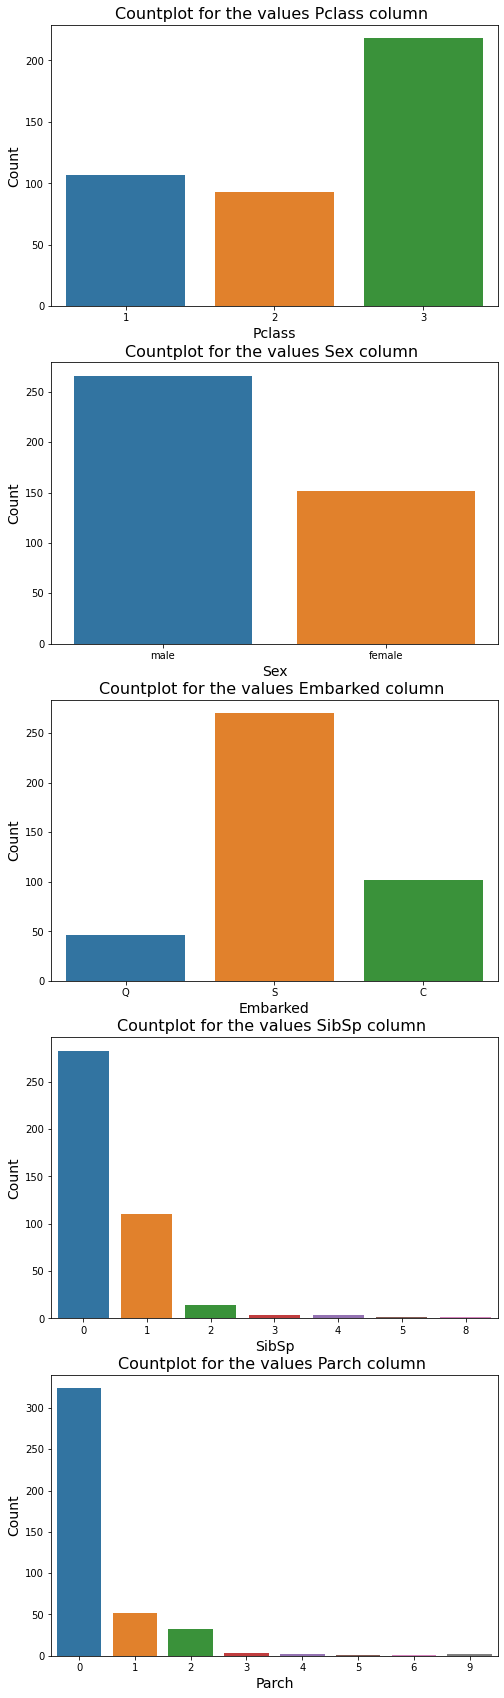

In [122]:
# Plot count plots to see the proportion of values  in each categorical variable and discrete numerical variable (test set)
col_names= ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']


# Set the size of the figure
fig, ax = plt.subplots(len(col_names), figsize=(8,30))

# Plot the countplots
for i, col_val in enumerate(col_names):  
    sns.countplot(x=test[col_val], ax=ax[i])
    ax[i].set_title('Countplot for the values {} column '.format(col_val), fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)
    print(test[col_val].value_counts(normalize=True))

Even though the proportions of the values have changed in the test set, the variables still have the same characteristics.
* Most of the passengers were in 3rd class followed by 1st class then 2nd class
* Most of the passengers were males
* The majority of the passengers embarked the titanic at Southampton port
* Most of the passengers did not have a sibling or spouse on board
* The majority of the passengers did not have a parent or child on board
* The number of survivors will be predicted using the model


In [123]:
# Compute the general statistical summaries of the continuous numerical variables in the train set and test set
continuous = ['Age', 'Fare']
print(f'The statistical summaries of the continuous numerical variables in the train set are:\n{train[continuous].describe()}\n\nThe statistical summaries of the continuous numerical variables in the test set are:\n{test[continuous].describe()}\n\n')

# Compute the skewness of the values in the variables in each set
print(f'The skewness of the values in each numerical variable in the train set is as follows:\n{train[continuous].skew()}\n\nThe skewness of the values in each numerical variable in the test set is as follows:\n{test[continuous].skew()}\n\n')

# Compute the kurtosis of the values in the variables in each set
print(f'The kurtosis of the values in each numerical variable in the train set is as follows:\n{train[continuous].kurt()}\n\nThe kurtosis of the values in each numerical variable in the test set is as follows:\n{test[continuous].kurt()}')


The statistical summaries of the continuous numerical variables in the train set are:
         Age   Fare
count 891.00 891.00
mean   29.77  32.20
std    13.02  49.69
min     0.00   0.00
25%    22.00   7.91
50%    30.00  14.45
75%    35.00  31.00
max    80.00 512.33

The statistical summaries of the continuous numerical variables in the test set are:
         Age   Fare
count 418.00 418.00
mean   30.20  35.63
std    12.63  55.84
min     0.00   0.00
25%    23.00   7.90
50%    30.00  14.45
75%    35.75  31.50
max    76.00 512.33


The skewness of the values in each numerical variable in the train set is as follows:
Age    0.42
Fare   4.79
dtype: float64

The skewness of the values in each numerical variable in the test set is as follows:
Age    0.53
Fare   3.69
dtype: float64


The kurtosis of the values in each numerical variable in the train set is as follows:
Age     0.93
Fare   33.40
dtype: float64

The kurtosis of the values in each numerical variable in the test set is as follows:
A

* 'Age' is moderately/fairly distributed while 'Fare' is highly skewed to the right.
* We will plot histograms to visualize the distribution of values in the two columns 

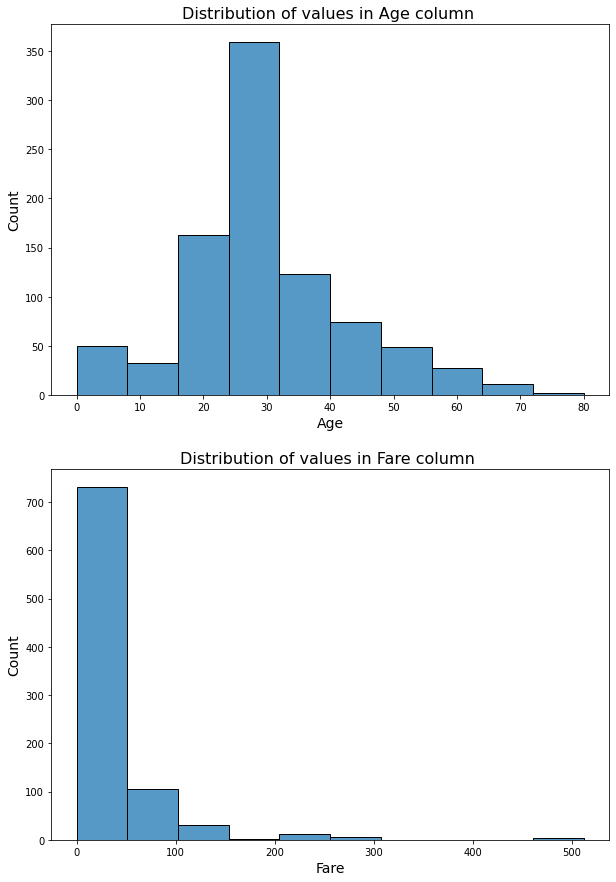

In [124]:
# Plot histograms to see the distributions of values in each numerical variable (train set)
col_names= continuous

# Set the size of the figure
fig, ax = plt.subplots(len(col_names), figsize=(10,15))

# Plot the histograms
for i, col_val in enumerate(col_names):
    sns.histplot(train[col_val], bins=10, ax=ax[i])
    ax[i].set_title('Distribution of values in {} column '.format(col_val), fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)

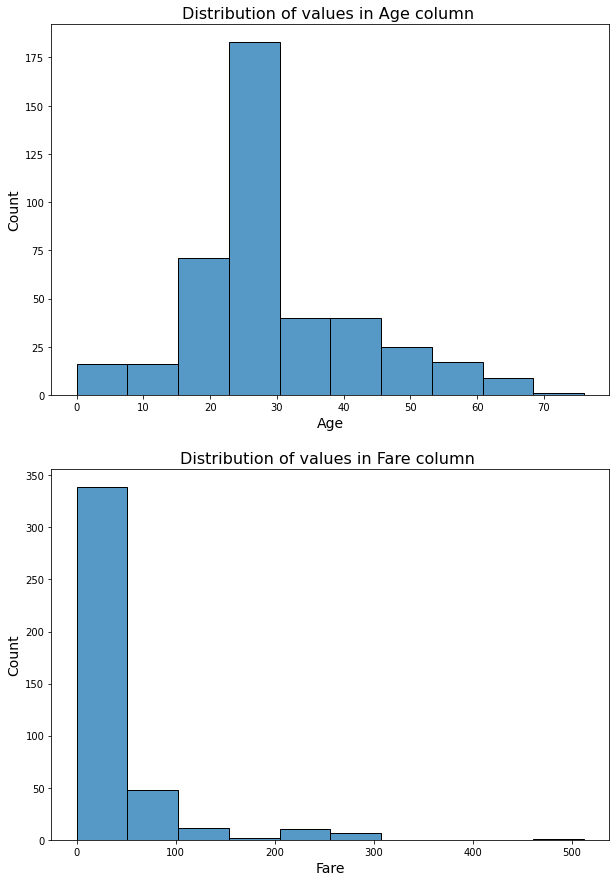

In [125]:
# Plot histograms to see the distributions of values in each numerical variable (test set)
col_names= continuous

# Set the size of the figure
fig, ax = plt.subplots(len(col_names), figsize=(10,15))

# Plot the histograms
for i, col_val in enumerate(col_names):
    sns.histplot(test[col_val], bins=10, ax=ax[i])
    ax[i].set_title('Distribution of values in {} column '.format(col_val), fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)

* The values in 'Age' columns are fairly/moderately distributed with a majority of the passengers being between ages 25 and 30
* The values in 'Fare' columns are right skewed with a majority of the passengers paying between 0-50 for fare

### Bivariate analysis
Bivariate analysis will enable us to establish the relationship between two variables

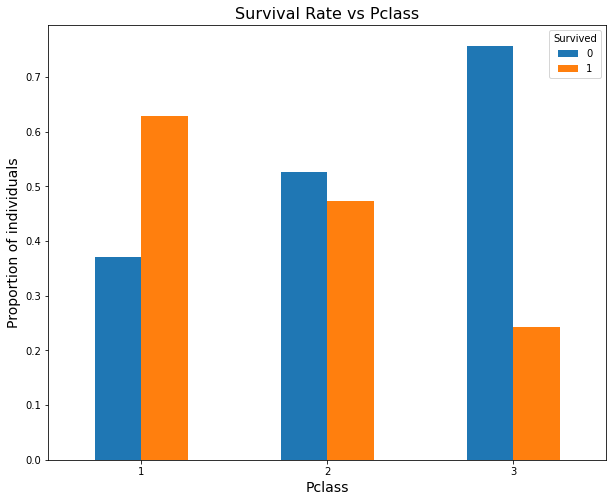

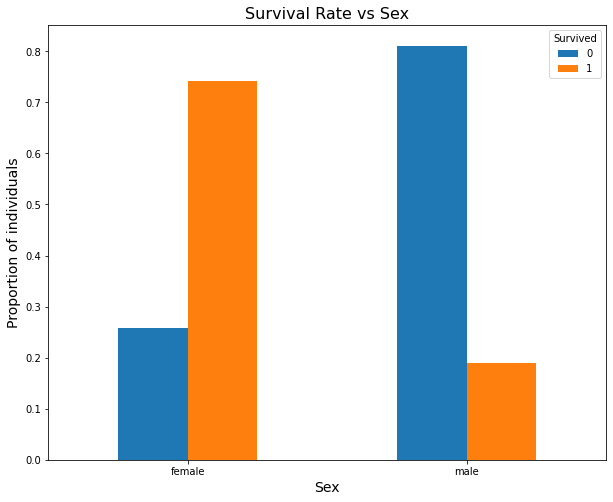

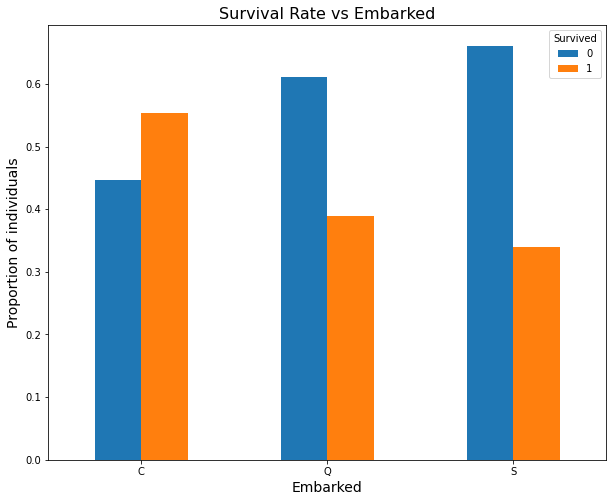

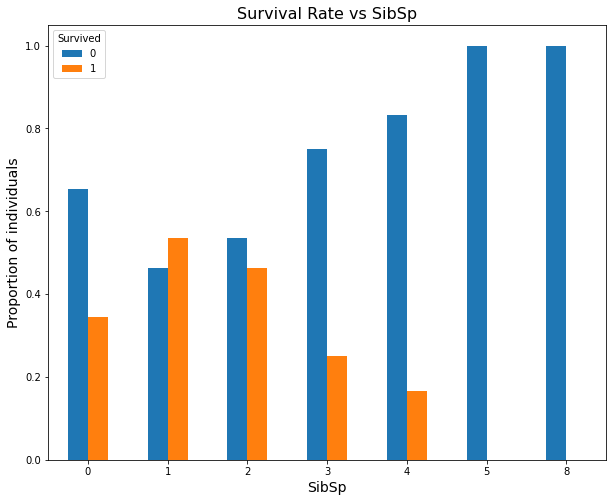

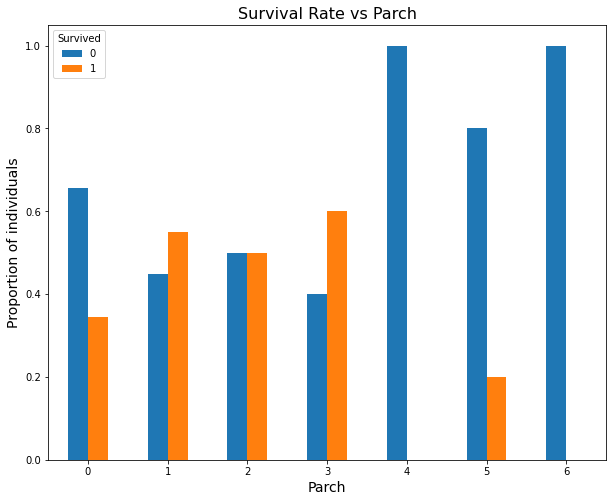

In [126]:
# Plot bar graphs to see the survival rates of the individuals per the different categotical and discrete numerical variables

# Create a list of the variables
col_names= ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

# Plot the bar graphs
for col_val in col_names:
  cross_tab = pd.crosstab(train[col_val],train['Survived']) # Create a crosstab that compares the number of survivors and deceased for each value in each variable 
  cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False) # Find the proportions of the values and plot a bar graph
  plt.title('Survival Rate vs {}'.format(col_val), fontsize = 16)
  plt.xlabel(col_val, fontsize = 14)
  plt.ylabel('Proportion of individuals', fontsize = 14)
  plt.xticks(rotation = 'horizontal')
  plt.show()
  print('')

* Over 70% of the individuals in 3rd class died and over 60% of the individualss in first class survived
* Over 70% of the females survived while a little over 80% of the males died
* Over 60% of the passengers who embarked the titanic at Southampton port died, about 60% of the passengers who embarked the titanic at Queenstown port died, and over 50% of the individuals who embarked the titanic at Cherbourg survived.


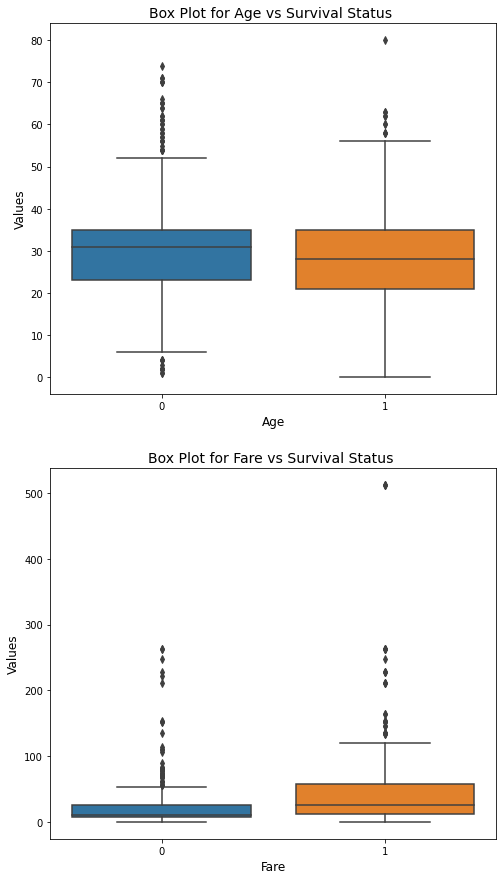

In [127]:
# Check the relationship between the survival status and age and fare using boxplots

# Specify the size of the figure
fig, ax = plt.subplots(len(continuous), figsize=(8,15))

# Plot boxplots for each variable
for i, col_val in enumerate(continuous):

    sns.boxplot(y=train[col_val], x=train['Survived'], ax=ax[i])
    ax[i].set_title('Box Plot for {} vs Survival Status '.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Values', fontsize=12)

* The interquatile range of ages of the survivors is larger than the interquartile range of ages of the deceased
* The median age of the survivors is lower than the median age of the deceased
* The interquartile range of fare of the survivors is larger than the interquartile range of range of the deceased
* The median fare of the survivors is higher than the median fare of the deceased

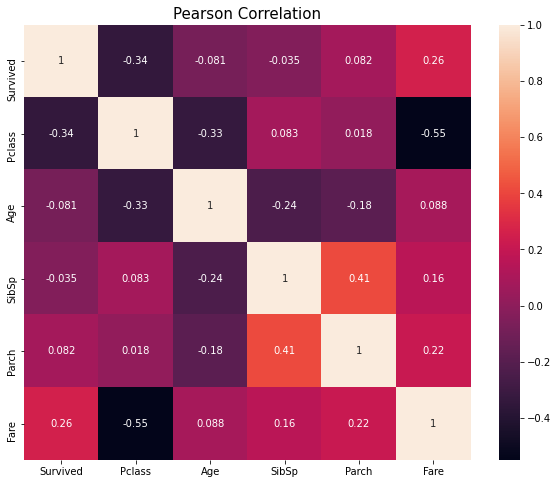

In [128]:
# Calculate the pearson correlation of the numerical variables
pearson_corr = train.corr()

# Specify the size of the figure
plt.figure(figsize=(10,8)) 

# Plot a correlation heat map
sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns, annot=True)
# Label the chart
plt.title('Pearson Correlation', fontsize=15, y=1.015)
# Display the heatmap
plt.show()



There is a moderate inverse correlation between fare and pclass

## Predictive analysis  
KNN  
We will build a KNN model to predict whether the some individuals died or survived depending on the data given in the test set.  
Before building the model we need to check for multicollinearity as its presence may affect the performance of the model

In [129]:
# Convert the values in 'Sex' and 'Embarked' columns to numerics

# Make a copy of the datasets
train_copy = train.copy()
test_copy = test.copy()

# Change the values
train_copy = train_copy.replace({'male':'1', 'female':'0', 'S':'1', 'C':'2', 'Q':'3'})
test_copy = test_copy.replace({'male':'1', 'female':'0', 'S':'1', 'C':'2', 'Q':'3'})

### Multicollinearity check

In [130]:
# Compute the VIF scores of the independent variables to check for multicollinearity

# Specify the independent variables
independent = train_copy.drop('Survived', axis=1)

# Compute the correlation coefficients of the variables
correlation = independent.corr()

# Compute and display the VIF scores
VIF = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)
VIF

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.65,0.41,-0.15,-0.09,0.91
Age,0.41,1.20,0.19,0.12,0.06
SibSp,-0.15,0.19,1.28,-0.45,-0.20
Parch,-0.09,0.12,-0.45,1.27,-0.26
Fare,0.91,0.06,-0.20,-0.26,1.59


The scores are within acceptable ranges, therefore, there is no need for dropping any variable

### Modelling

In [131]:
# Data preparation

# Divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = train_copy.drop(['Survived'], axis=1)
y = train_copy["Survived"]

# Feature Scaling

# Scale the features so they can have relatively normal distributions and so that they can all be uniformly evaluated
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

#### 80-20 split

In [132]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# The script above splits 80% of the data to training set and 20% of the data to test set

In [133]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3) # use default values of the other parameters

# Fit the model to the training data
knn.fit(X_train, y_train)

# Generate predictions based on the given test data
y_pred = knn.predict(X_test)

In [134]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n')


Accuracy: 79.33%
Confusion matrix:
[[91 17]
 [20 51]]



In [135]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       108
           1       0.75      0.72      0.73        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Using the 80-20 split the model is able to predict 79.33% of the data correctly.  
The classification report shows that the model has been able to predict 72% of the survival cases  and 84% of the death cases correctly.
The precision in predicting death cases is 82% while the precision in predicting survival cases is 75%

#### 70-30 split

In [136]:
# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=30)
# The script above splits 70% of the data to training set and 30% of the data to test set

In [137]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3) # use default values of the parameters

# Fit the model to the training data
knn.fit(X_train1, y_train1)

# Generate predictions based on the given test data
y_pred1 = knn.predict(X_test1)

In [138]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy1 = accuracy_score(y_test1, y_pred1)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy1)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test1, y_pred1)}\n')


Accuracy: 77.99%
Confusion matrix:
[[135  25]
 [ 34  74]]



In [139]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       160
           1       0.75      0.69      0.71       108

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



Using the 70-30 split the model is able to predict 77.99% of the data correctly.  
The classification report shows that the model has been able to predict 69% of the survival cases  and 84% of the death cases correctly.  
The precision in predicting death cases is 80% while the precision in predicting survival cases is 74%

#### 60-40 split

In [140]:
# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=30)
# The script above splits 60% of the data to training set and 30% of the data to test set

In [141]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3) # use default values of the parameters

# Fit the model to the training data
knn.fit(X_train2, y_train2)

# Generate predictions based on the given test data
y_pred2 = knn.predict(X_test2)

In [142]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy2 = accuracy_score(y_test2, y_pred2)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy2)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test2, y_pred2)}\n')


Accuracy: 78.99%
Confusion matrix:
[[181  37]
 [ 38 101]]



In [143]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       218
           1       0.73      0.73      0.73       139

    accuracy                           0.79       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357



Using the 60-40 split the model is able to predict 78.99% of the data correctly.  
The classification report shows that the model has been able to predict 73% of the survival cases  and 83% of the death cases correctly.
The precision in predicting death cases is 83% while the precision in predicting survival cases is 73%

### Optimizing model performance
The performance of KNN models can be improved by doing the following:
* Applying dimensionality reduction techniques
* Change the distance metric for different applications
* Rescaling the data
* Implementing weighted voting
* Applying appropriate nearest-neighbour techniques  
  
Since we have already scaled our data, we will apply dimensionality reduction technique (LDA) to see how the model fairs, using the 80-20 split data.

In [144]:
# Instantiate LDA
lda = LDA(n_components=1) # Use one component

# Apply LDA to the data
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [145]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3) # use default values of the parameters

# Fit the model to the training data
knn.fit(X_train, y_train)

# Generate predictions based on the given test data
y_pred3 = knn.predict(X_test)

In [146]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy3 = accuracy_score(y_test, y_pred3)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy3)))
# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred3)}\n')


Accuracy: 74.86%
Confusion matrix:
[[86 22]
 [23 48]]



In [147]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       108
           1       0.69      0.68      0.68        71

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



Dimensionality reduction has lowered the performance of the model instead of improving it.  
The model has  predicted 74.86% of the data correctly.  
The classification report shows that the model has been able to predict 68% of the survival cases  and 80% of the death cases correctly.
The precision in predicting death cases is 79% while the precision in predicting survival cases is 69%  
These values show that our data is not right for dimensionality reduction so we will stick to rescaling of data as a means of model optimization.

## Challenging the solution  
We will challenge the solution by changing the distance metric to see how the model fairs. 

In [148]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# The script above splits 80% of the data to training set and 20% of the data to test set

In [149]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan') # use default values of the other parameters

# Fit the model to the training data
knn.fit(X_train, y_train)

# Generate predictions based on the given test data
y_pred4 = knn.predict(X_test)

In [151]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy4 = accuracy_score(y_test, y_pred4)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy4)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred4)}')


Accuracy: 79.33%
Confusion matrix:
[[91 17]
 [20 51]]


In [152]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       108
           1       0.75      0.72      0.73        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



The model's performance has not changed after changing the distance metric to 'manhattan'. The model's accuracy score is still 79.33%  
The classification report shows that the model has been able to predict 72% of the survival cases  and 84% of the death cases correctly.
The precision in predicting death cases is 82% while the precision in predicting survival cases is 75%. We will set the distance metric to 'euclidean' to see whether there will be any change.

In [153]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean') # use default values of the other parameters

# Fit the model to the training data
knn.fit(X_train, y_train)

# Generate predictions based on the given test data
y_pred5 = knn.predict(X_test)

In [154]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy5 = accuracy_score(y_test, y_pred5)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy5)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred5)}')


Accuracy: 79.33%
Confusion matrix:
[[91 17]
 [20 51]]


In [155]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       108
           1       0.75      0.72      0.73        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



The model's performance has not changed after changing the distance metric to 'euclidean'. The model's accuracy score is still 79.33%  
The classification report shows that the model has been able to predict 72% of the survival cases  and 84% of the death cases correctly.
The precision in predicting death cases is 82% while the precision in predicting survival cases is 75%

## **Conclusions**  
* The KNN model has done a decent job at predicting the survival status of the titanic passengers
* The 80-20 split model has performed better than the other two
* Rescaling of data is the only optimization technique that has improved the performance of the model. (Data reduction lowered the performance while, changing the distance metric made no impact to the model)
* As much as the performance of the model is decent, it is lower than our metric of success, therefore the project can't be considered successful 

## **Recommendations**
* One may tweak the values of the other parameters to see whether it makes a positive impact on the performance of the of the model
* One may try out the other techniques of model performance optimization to establish whether they can improve the performance of the model
* One may use other classification techniques such as decision trees to establish whether they can perform better than the KNN

### Predicting survival status given the test data

In [156]:
# Data preparation

# Divide the data into "attributes" and "labels"
X_train3 = train_copy.drop(['Survived'], axis=1)
y_train3 = train_copy["Survived"]
X_test3 = test_copy.values

# Feature Scaling

# Scale the features so they can have relatively normal distributions and so that they can all be uniformly evaluated
scaler = MinMaxScaler()
X_train3 = scaler.fit_transform(X_train3) 
X_test3 = scaler.fit_transform(X_test3)

In [157]:
# Traning the algorithm and making predictions

# Instantiate KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3) # use default values of the other parameters

# Fit the model to the training data
knn.fit(X_train3, y_train3)

# Generate predictions based on the given test data
y_pred6 = knn.predict(X_test3)

# create a dataframe that shows the preditions
df = pd.DataFrame({'Prediction': y_pred6})
